In [1]:
%matplotlib inline
# %config InlineBackend.figure_formats = ['svg']

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from harissa_benchmark import Benchmark, available_networks, available_inferences
from harissa_benchmark.generators import InferencesGenerator
from harissa_benchmark.plotter import InteractionPlotter
from harissa.plot import build_pos, plot_network

print(available_networks())
print(available_inferences())

['FN4', 'FN8', 'Trees5', 'Trees10', 'Trees20', 'Trees50', 'Trees100', 'BN8', 'CN5']
['Cardamom', 'Pearson', 'Genie3', 'Sincerities', 'Hartree']


In [3]:
gen = Benchmark(path='datagen')

# for name, network in gen.networks_generator.networks.items():
#     print(f'{name}:')
#     plot_network(network.interaction, build_pos(network.interaction))

In [4]:
gen.generate()

In [5]:
show_networks = True
networks = dict(sorted(gen.generators[0].networks_generator.networks.items()))
nb_networks = len(networks)

networks_pos = [
    build_pos(network.interaction) for network in networks.values()
]
scores = gen.scores
order = [
    'Hartree', 
    'Cardamom',
    'Genie3', 
    'Sincerities',
    # 'PIDC': (cmap(4), cmap(5)), 
    'Pearson',
    # 'SCRIBE_timed': (cmap(10), cmap(11)), 
    # 'SCRIBE_wadd': (cmap(12), cmap(13)),
    # 'SCRIBE_pseudotimed': (cmap(16), cmap(17)), 
    # 'Random': 2*('lightgray',)
]
# reordering
for key, value in scores.items():
    scores[key] = {k:value[k] for k in order}

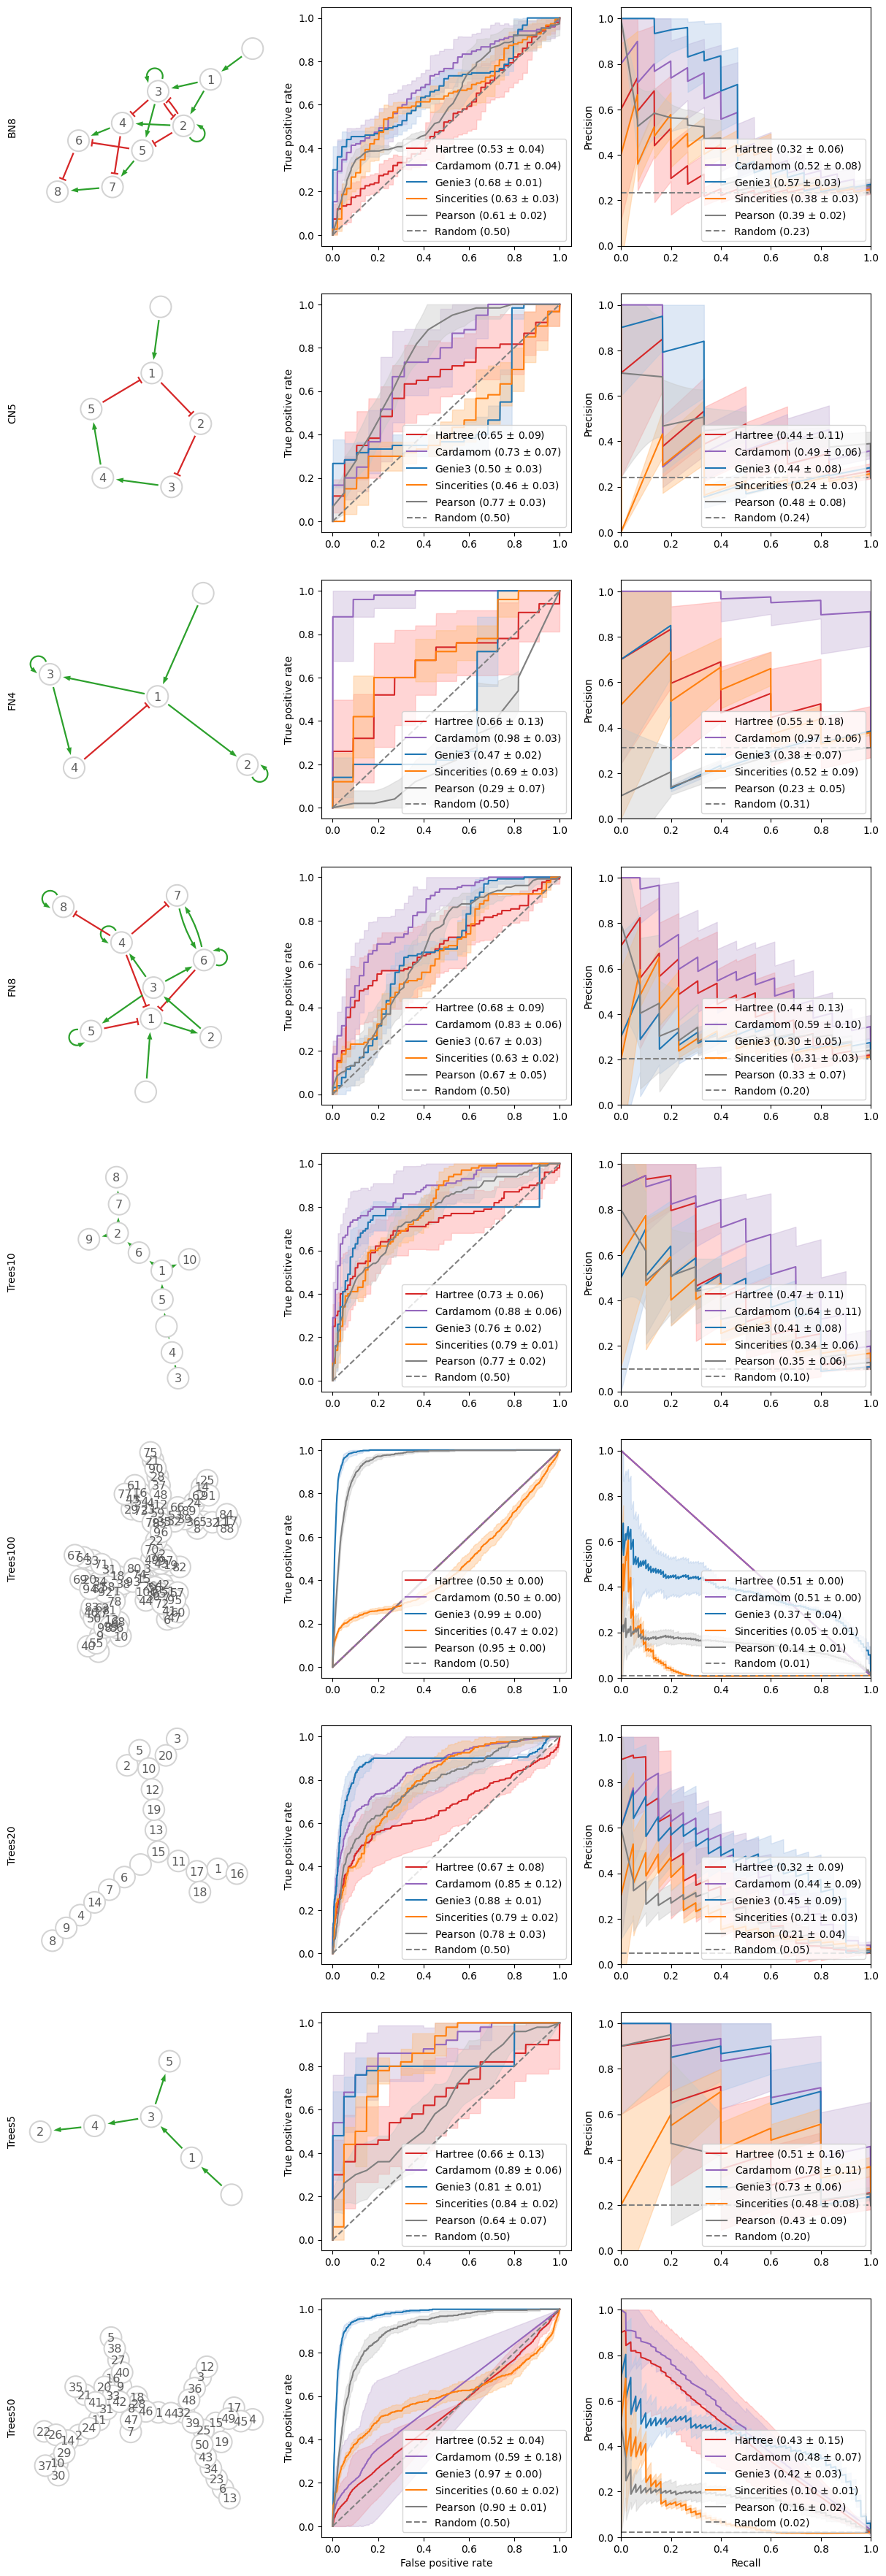

In [6]:
fig = plt.figure(figsize=(5*(2 + show_networks), 5*len(networks)), dpi=100)
grid = gs.GridSpec(nb_networks, 2 + show_networks)

for i, (net_name, network) in enumerate(networks.items()):
    plotter = InteractionPlotter(network)
    j = 0
    if show_networks:
        ax = fig.add_subplot(grid[i, j])
        plot_network(
            network.interaction, 
            networks_pos[i],
            axes=ax,
            scale=20
        )
        ax.set_ylabel(f'{net_name}')
        j = 1
    
    roc_ax = fig.add_subplot(grid[i, j+0])
    pr_ax = fig.add_subplot(grid[i, j+1]) 

    sc = scores[net_name]
    plotter.plot_rocs(sc, roc_ax)
    plotter.plot_prs(sc, pr_ax)

    if i < nb_networks - 1:
        roc_ax.set_xlabel('')
        pr_ax.set_xlabel('')

fig.show(warn=False)
fig.savefig('figure_mean_curve.pdf')


In [7]:
gen.save('datagen2')

Networks saved at /home/nseyler/Work/benchmark/datagen2/networks                                    
Datasets saved at /home/nseyler/Work/benchmark/datagen2/datasets                                    /
Scores saved at /home/nseyler/Work/benchmark/datagen2/scores                                        e


PosixPath('datagen2/scores')